# Example 1: Making and plotting grid objects

`PlateFlex` comes equipped with a number of classes to handle 2D array data that all inherit from a parent `Grid` class. This `Grid` class contains methods for loading 2D data, making contours based on the data, calculating the wavelet transform and scalogram, and plotting the grid, wavelet transform and scalograms. In this first example we will explore how to load data from a three-column `.xyz` file and plot them.

Start by importing the necessary modules - here we use the parent `Grid` class for illustration

In [1]:
import numpy as np
import pandas as pd
from plateflex import Grid

Let's load topography data covering the North American continent extracted from the ETOPO1 model. This file was obtained separately using GMT (check the project's documentation [here](https://paudetseis.github.io/PlateFlex/getting_started.html#making-gridded-data) for more details on data preparation). Note that the `Grid` class only requires a rectangular (or square) 2D array of data and specification of the sampling distance in the x- and y-directions. 

In [2]:
# Read header (first line) of data set using pandas to get grid parameters
xmin, xmax, ymin, ymax, zmin, zmax, dx, dy, nx, ny = \
pd.read_csv('../data/Topo_NA.xyz', sep='\t', nrows=0).columns[1:].values.astype(float)

# Change type of nx and ny from float to integers
nx = int(nx); ny = int(ny)

Now we can load the data using `pandas`. Note how the data are reshaped and flipped in the vertical direction to be consistent with the map orientation during plotting.

In [3]:
# Read topography data 
topodata = pd.read_csv('../data/Topo_NA.xyz', sep='\t', \
    skiprows=1, names=['x', 'y', 'z'])['z'].values.reshape(ny,nx)[::-1]

Once the 2D array is is memory, we can initialize a `Grid` object with the following arguments:

In [4]:
# Load the data as `Grid` object
topo = Grid(topodata, dx, dy)

You can get help about the object and its methods by reading the docstring:

In [5]:
help(topo)

Help on Grid in module plateflex.classes object:

class Grid(builtins.object)
 |  Grid(grid, dx, dy)
 |  
 |  An object containing a 2D array of data and Cartesian coordinates specifying the
 |  bounding box of the array. Contains methods to calculate the wavelet transform, 
 |  wavelet scalogram and to plot those quantities at a specified wavenumber index.
 |  
 |  :type grid: :class:`~numpy.ndarray`
 |  :param grid: 2D array of of topography/gravity data
 |  :type dx: float
 |  :param dx: Grid spacing in the x-direction (km)
 |  :type dy: float
 |  :param dy: Grid spacing in the y-direction (km)
 |  
 |  Grid must be projected in km.
 |  
 |  .. rubric:: Default Attributes
 |  
 |  ``data`` : :class:`~numpy.ndarray`
 |      2D array of topography/gravity data (shape (`nx,ny`))
 |  ``dx`` : float 
 |      Grid spacing in the x-direction in km
 |  ``dy`` : float 
 |      Grid spacing in the y-direction in km
 |  ``nx`` : int 
 |      Number of grid cells in the x-direction
 |  ``ny`` :

And you can check which attributes are available:

In [6]:
topo.__dict__

{'nx': 342,
 'ny': 341,
 'dx': 20.0169157785,
 'dy': 19.9970844654,
 'units': None,
 'sg_units': None,
 'logsg_units': None,
 'title': None,
 'ns': 19,
 'k': array([2.60106395e-06, 3.22337138e-06, 3.99456654e-06, 4.95027100e-06,
        6.13462882e-06, 7.60234554e-06, 9.42121512e-06, 1.16752513e-05,
        1.44685680e-05, 1.79301889e-05, 2.22200064e-05, 2.75361676e-05,
        3.41242261e-05, 4.22884849e-05, 5.24060517e-05, 6.49442575e-05,
        8.04822429e-05, 9.97377085e-05, 1.23600066e-04]),
 'data': array([[-4773.43994141, -4770.30712891, -4736.65576172, ...,
         -3779.10644531, -3609.01147461, -4773.43994141],
        [-4778.16992188, -4795.12939453, -4804.34228516, ...,
         -3775.15356445, -3628.46166992, -4778.16992188],
        [-4829.92382812, -4865.66894531, -4797.75439453, ...,
         -3748.75512695, -3561.30175781, -4829.92382812],
        ...,
        [  -45.76174164,   -38.02427292,   -21.88285637, ...,
         -2385.19848633, -2406.828125  ,   -45.7617416

There's a few things to note at this point. 
* The grid parameters (`nx`, `ny`, `dx`, `dy`) are always available as `Grid` object attributes. You can extract their value using, e.g., `topo.nx`
* The `data` attribute is a 2D numpy array of shape (`nx`, `ny`). You can check this with `topo.data.shape`. 
* The `k` attribute is the optimal set of adjacent wavelet-equivalent wavenumbers automatically calculated based on the grid parameters during initialization of the `Grid` object. 
* The attributes `units`, `sg_units`, `logsg_units` and `title` are set to `None`, because we are using the parent `Grid` class. Derived classes (e.g., `TopoGrid`) will have default values for those attributes.

The next logical step is to plot the 2D data from the `Grid` object. This is done by calling the object's method `plot()`:

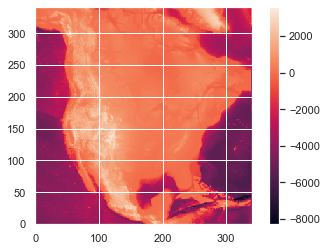

In [7]:
topo.plot()

The `plot()` method uses `pyplot.imshow` to render a colored map of the topography data with a colorbar. Although the outline of the continent is visible, the plot looks rather rough at this point. To check which arguments are set by default, type

In [8]:
help(topo.plot)

Help on method plot in module plateflex.classes:

plot(mask=None, title=None, save=None, clabel=None, contours=None, **kwargs) method of plateflex.classes.Grid instance



At this point you could either: 1) add a title; 2) save the plot; or 3) add a label on the colorbar. In addition, all `matplotlib.pyplot.imshow` keyword arguments are also available through the `**kwargs` entries. 

Now, let's beautify the map . We can start by extracting the coastlines directly from the object's method `make_contours()` with a level of `0.`, which corresponds to sea level:

In [9]:
# Extract contours
contours = topo.make_contours(0.)

We can also make a mask over deep ocean basins. Later, such a mask will determine whether or not the flexural analysis is performed over those grid cells.

In [10]:
# Make mask 
mask = (topo.data < -500.)

Now, let's make a new plot with the contours, the mask and a more intuitive colormap with limits:

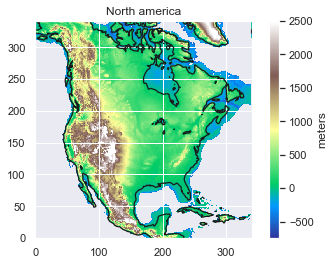

In [11]:
topo.plot(mask=mask, contours=contours, title='North america', clabel='meters', cmap='terrain', vmin=-750, vmax=2500)

You can now go to Example 2 to calculate the wavelet transform and scalogram and plot them.